In [216]:
from IPython.display import Image

# CORE API v2 demo

## Short intro CORE 

CORE’s aim is to aggregate Open Access content from across the world. We provide seamless access to over 30 million metadata records and 3 million full-text items accessible through a website, API and downloadable Data Sets.


## Why CORE's API is important

Unlike other search engines out there, we offer an API

1. Programmable data access
2. Transaction information access
3. Analytical information access 

Seamless access to the all research papers stored in 100s of repos.

Interacting only with one endpoint that holds the aggregated content and not with 100s of repositories endpoints

3 main entities available:
*Articles
*Repositories
*Journals

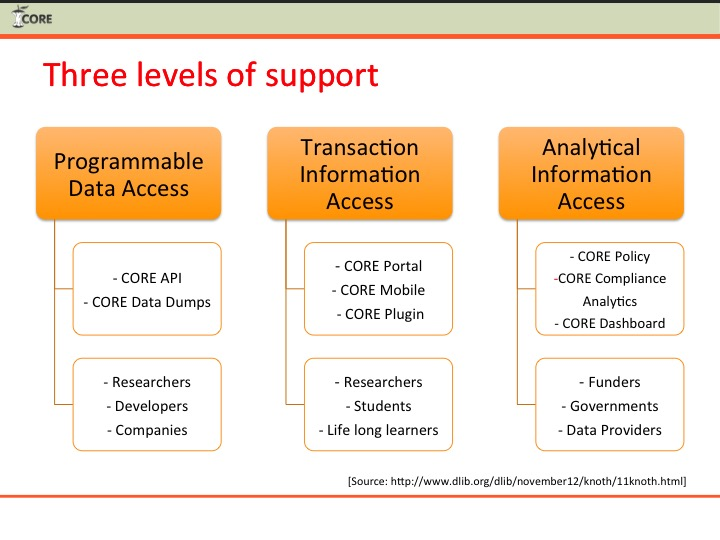

In [217]:
Image(filename='images/Slide03.jpg') 

## CORE API use cases examples

### 1

Brighton university wanted to discover in what other repositories (IR or subject) their deposited items (co-)exist. Did a basic investigation using CORE API:

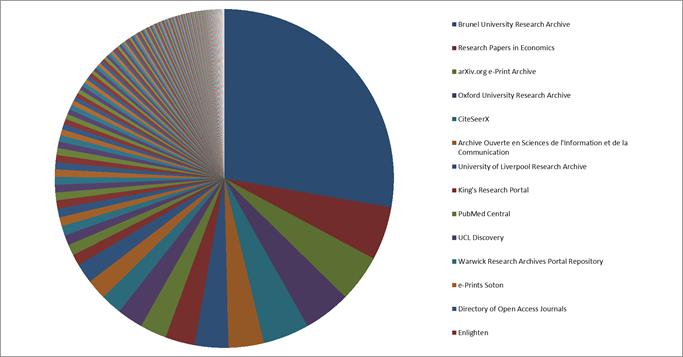

In [218]:
Image(filename='images/image004.png')

Blue is Brighton, Red is Repec, then arxiv, oxford, citeseer,....

### 2

Primary data source for innovation oriented search engine [Wheesbee](https://www.wheesbee.eu/wheesbee-web/) 

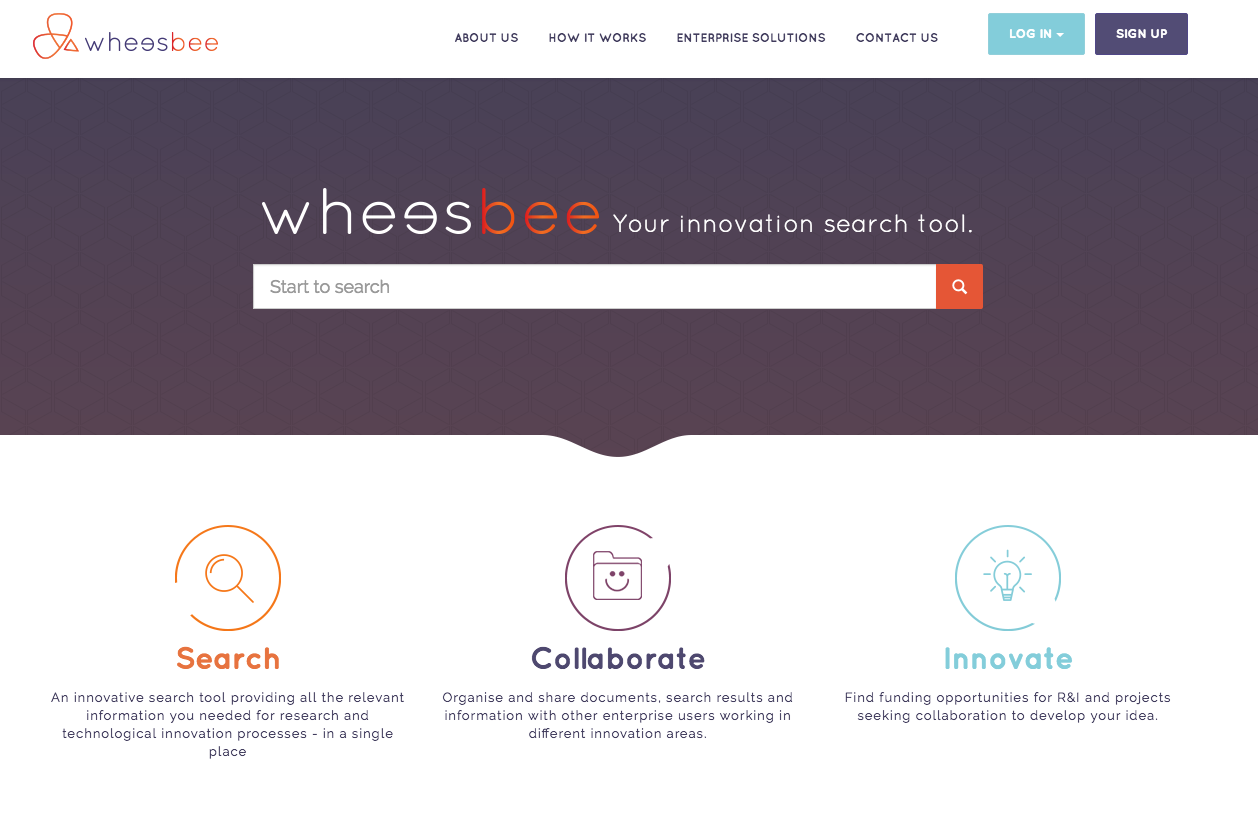

In [219]:
Image(filename='images/Screen Shot 2016-06-09 at 19.27.30.png')

### 3

ResearchResearch - a London based company focusing on discovering funding opportunities for organisations.
>
> As an independent company, we had no obvious access to big, diverse scholarly data - a killer in our drive to develop classification algorithms. The CORE repository, available in bulk, was a breakthrough. Now our algorithms outperform even those from huge publishers.

> The adoption of CORE helped to dramatically boost the performance of our ML algorithms indicated by a substantial increase in F-measure 

They were so happy, that:

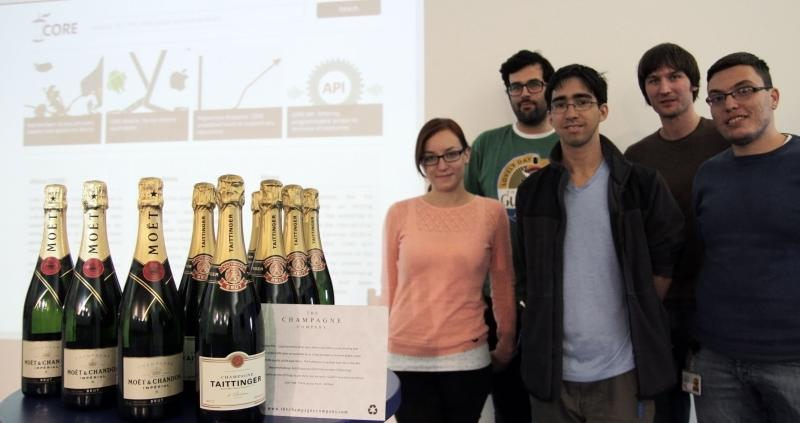

In [221]:
Image(filename='images/IMG_8051-edit_02031.jpg')

## CORE API v2

### Searching different entities

Ability to search through different entities like: 
#### Articles
e.g.:
articles on blockchain

In [222]:
url = 'https://core.ac.uk:443/api-v2/articles/search/Blockchain?apiKey=20hIsS1F5j4D2C2iXrg4Wxf7VTp4Xt1j'

In [223]:
import urllib.request
import json

In [ ]:
with urllib.request.urlopen(url) as response:
    resp = response.read()
resp[:1000]

In [225]:
# which is in json format
result_as_json = json.loads(resp.decode('utf-8'))
result_as_json

{'data': [{'authors': ['Richard Aedy'],
   'contributors': [],
   'datePublished': '2016-02-04 00:00:00',
   'description': 'The blockchain technology that began life via virtual currency bitcoin could yet prove as transformative as the internet. The structure of blockchain ensures that any transaction between two entities only proceeds on the basis of transparency and consensus. So could fraud be a thing of the past? Will blockchain revolutionise business and society as developers claim? And why is the ASX leading the charge here in Australia?\n\nGuests\n\n\n\tConstance Choi CEO Seven Advisory Founder of Coala global\n\tHenning Diedrich IBM ADEPT project (IoT &amp; Blockchains\n\tDilan Rajasingham Executive manager, technology innovation, Commonwealth Bank of Australia\n\tLeanne Kemp Founder and CEO Everledger\n\tPeter Hiom Deputy Chief Executive ASX\n\n\nCredits \n\n\n\tPresenter Richard Aedy\n\tProducer Kate Pearc',
   'fulltextIdentifier': 'https://core.ac.uk:443/download/pdf/30669

#### Repositories

E.g. search to find brunels university repository:

In [226]:
url = 'https://core.ac.uk:443/api-v2/repositories/search/brunel?page=1&pageSize=10&apiKey=20hIsS1F5j4D2C2iXrg4Wxf7VTp4Xt1j'
with urllib.request.urlopen(url) as response:
    resp = response.read()
result_as_json = json.loads(resp.decode('utf-8'))
result_as_json

{'data': [{'OpenDoarId': 900,
   'id': 14,
   'name': 'Brunel University Research Archive',
   'repositoryLocation': {'country': '',
    'countryCode': 'GB',
    'latitude': '51.532847',
    'longitude': '-0.472856',
    'repositoryName': ''},
   'uri': 'http://bura.brunel.ac.uk/oai/request'}],
 'status': 'OK',
 'totalHits': 1}

#### Journals
Search to find journals:
e.g. find a journal by its issn:

In [227]:
url = "https://core.ac.uk:443/api-v2/journals/get/1453-1305?apiKey=20hIsS1F5j4D2C2iXrg4Wxf7VTp4Xt1j"
with urllib.request.urlopen(url) as response:
    resp = response.read()
result_as_json = json.loads(resp.decode('utf-8'))
result_as_json

{'data': {'identifiers': ['oai:doaj.org/journal:f674bc1643e04f628fb921c747af3752',
   'issn:1453-1305',
   'issn:1842-8088',
   'url:https://doaj.org/toc/1842-8088'],
  'language': 'Romanian',
  'publisher': 'Inforec Association',
  'subjects': ['economic informatics',
   'information society',
   'information systems',
   'IT',
   'Computer engineering. Computer hardware',
   'TK7885-7895',
   'Electronics',
   'TK7800-8360',
   'Electrical engineering. Electronics. Nuclear engineering',
   'TK1-9971',
   'Technology',
   'T',
   'Bibliography. Library science. Information resources',
   'Z'],
  'title': 'Informatica Economica Journal'},
 'status': 'OK'}

#### or a combination of the above (!) e.g.

E.g. search in a generic way for 
> Economics !


In [228]:
url = "https://core.ac.uk:443/api-v2/search/Economics?page=1&pageSize=10&apiKey=20hIsS1F5j4D2C2iXrg4Wxf7VTp4Xt1j"
with urllib.request.urlopen(url) as response:
    resp = response.read()
result_as_json = json.loads(resp.decode('utf-8'))
result_as_json

{'data': [{'id': 'issn:2147-8988', 'type': 'journal'},
  {'id': 'issn:2148-3809', 'type': 'journal'},
  {'id': 'issn:2229-6158', 'type': 'journal'},
  {'id': 'issn:1508-2008', 'type': 'journal'},
  {'id': 'issn:1689-765X', 'type': 'journal'},
  {'id': '29954126', 'type': 'article'},
  {'id': '29854534', 'type': 'article'},
  {'id': 'issn:1802-792X', 'type': 'journal'},
  {'id': 'issn:1545-2921', 'type': 'journal'},
  {'id': 'issn:1994-1625', 'type': 'journal'}],
 'status': 'OK',
 'totalHits': 1795498}

Result set above contains Journals and Articles. Further down (after a lot of pages includes also repositories having in their description something about economics, such as Repec

### Powerful query syntax

All of the API search methods allow using complex search queries. 
The query can be a simple string or it can be built using terms and 
operators described in Elasticsearch documentation. The usable field 
names are title, description, fullText, authorsString, publisher, 
repositoryIds, doi, identifiers (which is a list of article identifiers 
including OAI, URL, etc.), language.name and year. 

Some example queries:

    title:psychology and language.name:English

    repositories.id:86 AND year:2014

    identifiers:"oai:aura.abdn.ac.uk:2164/3837" OR identifiers:"oai:aura.abdn.ac.uk:2164/3843"

    doi:"10.1186/1471-2458-6-309"

searching by doi so important! 

Underlying power of lucene syntax (exposed here via elasticsearch)

### Swagger 

#### Documentation

Finally, documentation that makes sense!

E.g. list of operations:

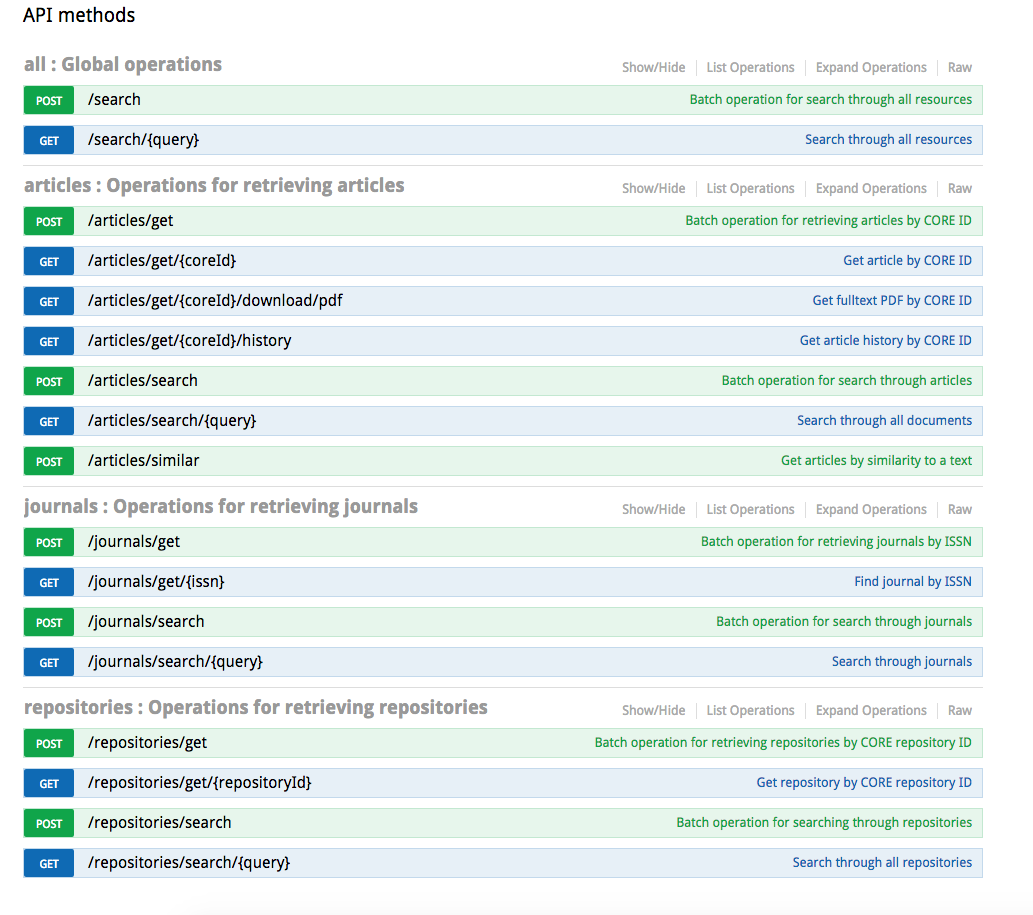

In [229]:
Image(filename='images/Screen Shot 2016-06-09 at 19.44.46.png')

but also a formal description of the response, headers, response content-types, parameters, etc.:

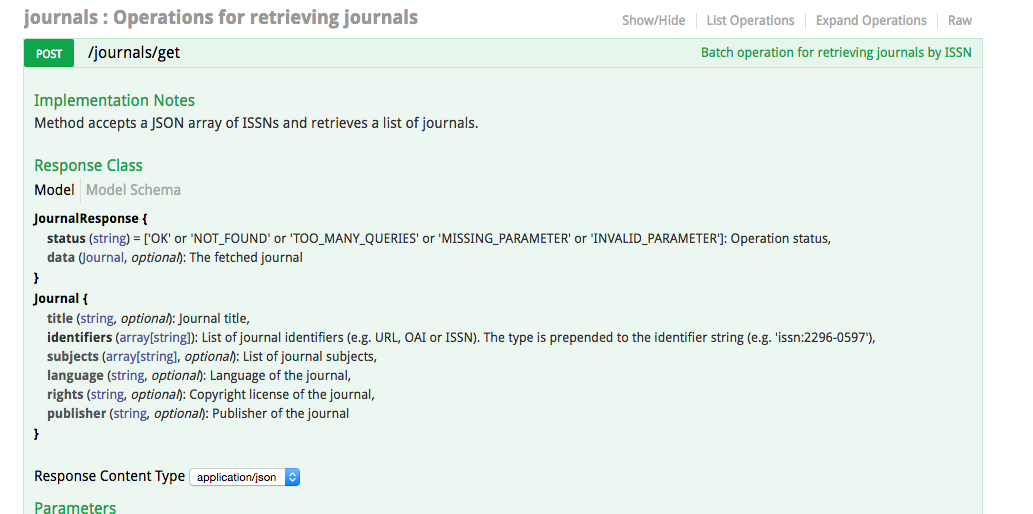

In [230]:
Image(filename='images/Screen Shot 2016-06-09 at 19.45.19.png')


Documentation not just as a static reference manual but also a live test console: (!)

#### Test console 

[Quick demo](https://core.ac.uk/docs/)

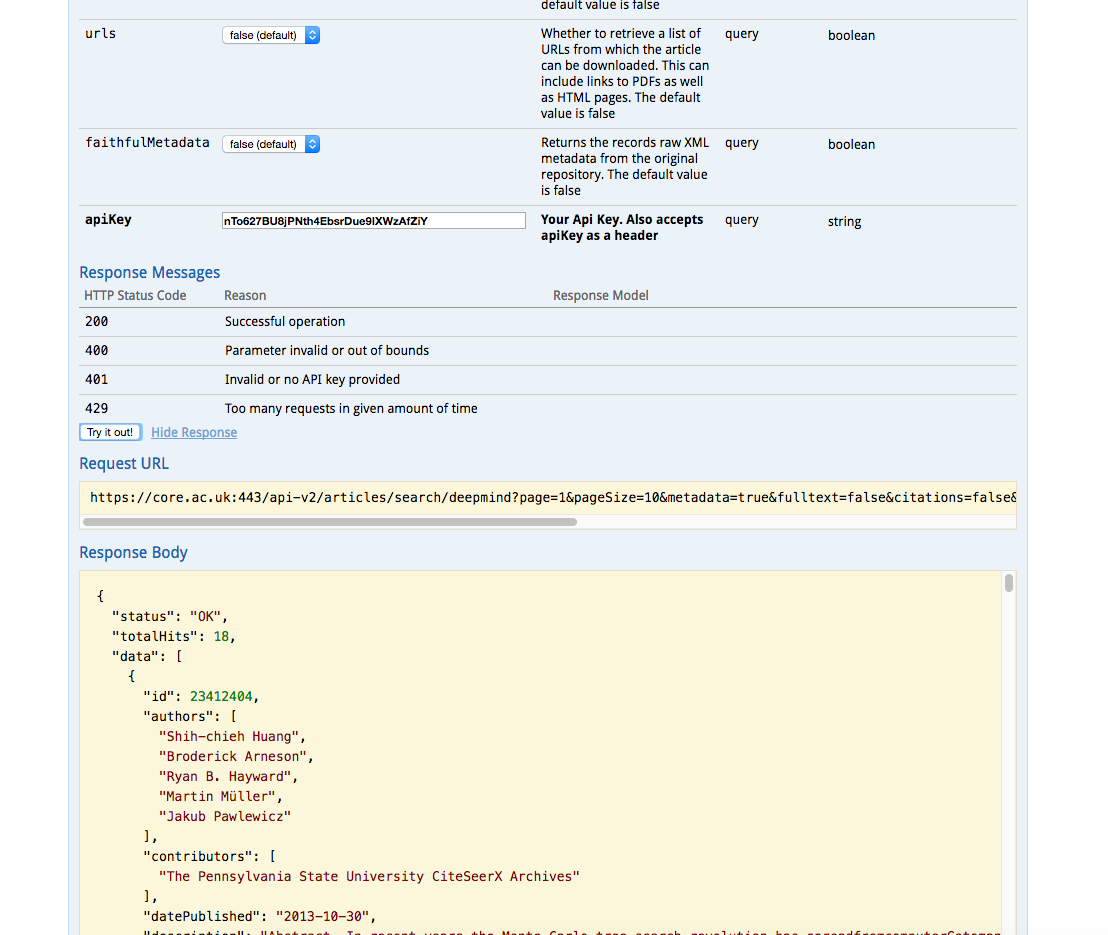

In [231]:
Image(filename='images/Screen Shot 2016-06-09 at 19.52.55.png')

#### Build a client of your preference with no hussle

A client in a programming language of **your choice**
either via CLI tool:

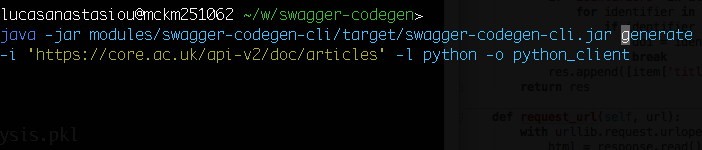

In [232]:
Image(filename='images/Screen Shot 2016-06-10 at 11.32.18.png')

or by using online [editor](http://editor.swagger.io/#/): 

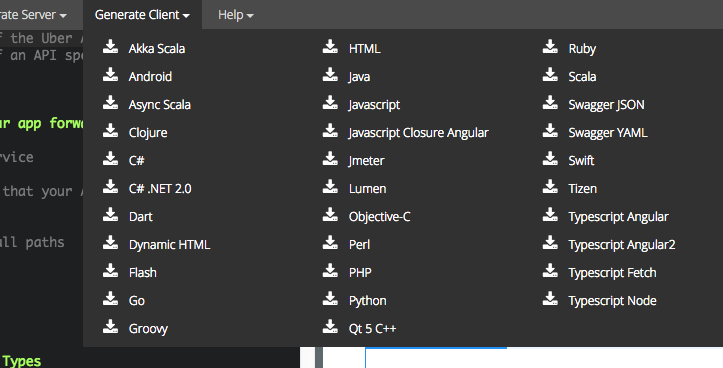

In [233]:
Image(filename='images/Screen Shot 2016-06-10 at 11.35.22.png')

In [234]:
### Full lucene syntax ready 
### REST-ful API
### Improve stability





## Using swagger
Use web UI, use the key you got from before

## Key registration
(1 minute)
Screenshot or live demo ?
https://core.ac.uk/api-keys/register
If you build something beatiful, please share it with us !


# A small data-analysis app

Using CORE data to analyse research trend on a certain topic.
1. What are the main countries contributing to it
2. How interest in this evolves over time?

Outline :

1. First build a small wrapper class
2. Fetch articles of a topic using API (API use)
3. Store locally for future use
4. Plot trend over time
5. What repositories host articles on this ? (API use)
6. Fetch fulltext for further information extraction (API use)
7. Plot countries of origin (email extraction of authors)

## 1. small wrapper class

In [235]:
import urllib.request
import urllib.parse
import json
import pprint

class CoreApiRequestor:

    def __init__(self, endpoint, api_key):
        self.endpoint = endpoint
        self.api_key = api_key
        #defaults
        self.pagesize = 100
        self.page = 1

    def parse_response(self, decoded):
        res = []
        for item in decoded['data']:
            doi = None
            if 'identifiers' in item:
                for identifier in item['identifiers']:
                    if identifier and identifier.startswith('doi:'):
                        doi = identifier
                        break
            res.append([item['title'], doi])
        return res

    def request_url(self, url):
        with urllib.request.urlopen(url) as response:
            html = response.read()
        return html

    def get_method_query_request_url(self,method,query,fullText,page):
        if (fullText):
            fullText = 'true'
        else:
            fullText = 'false'
        params = {
            'apiKey':self.api_key,
            'page':page,
            'pageSize':self.pagesize,
            'fulltext':fullText
        }
        return self.endpoint + method + '/' + urllib.parse.quote(query) + '?' + urllib.parse.urlencode(params)

    def get_up_to_20_pages_of_query(self,method,query,fulltext):
        url = self.get_method_query_request_url(method,query,fulltext,1)
        all_articles=[]
        resp = self.request_url(url)
        result = json.loads(resp.decode('utf-8'))
        all_articles.append(result)
        if (result['totalHits']>100):
            numOfPages = int(result['totalHits']/self.pagesize)  #rounds down
            if (numOfPages>20):
                numOfPages=20
            for i in range(2,numOfPages):
                url = self.get_method_query_request_url(method,query,False,i)
                print(url)
                resp =self.request_url(url)
                all_articles.append(json.loads(resp.decode('utf-8')))
        return all_articles

In [236]:
'''
Example invokation
'''
# init 
endpoint = 'https://core.ac.uk/api-v2'

'''
********************************************
Add your own api key below
'''
api_key = 'nTo627BU8jPNth4EbsrDue9IXWzAfZiY'
'''
********************************************
'''
method = '/articles/search'
topic = 'deep AND learning'

api = CoreApiRequestor(endpoint,api_key)

In [1]:
'''
Get url
'''
url = api.get_method_query_request_url(method,topic,False,1)
url

NameError: name 'api' is not defined

In [238]:
'''
Get results
'''
result = api.request_url(url)

In [2]:
result

NameError: name 'result' is not defined

In [3]:
'''
Get first 20 pages of results (=20 pages * 100 articles per page = 2000 articles)


'''
#multi_page_result = api.get_up_to_20_pages_of_query(method,topic,False)
# Frist page:
multi_page_result[0]

NameError: name 'multi_page_result' is not defined

## 2. Fetch articles of a topic using API (API use)

In [241]:
import pickle

topic = 'deep AND learning'
ftopic = topic.replace(" ","")

queryOnlyFT = '(title:('+topic+') OR description:('+topic+') OR fullText:('+topic+')) AND fullText:*'
query = '(title:('+topic+') OR description:('+topic+') OR fullText:('+topic+'))'

# fetch all articles (with or without fulltext) matching topic query in title or abstract or fulltext
try:
    all_articles = pickle.load(open('all_articles_on'+ftopic+'.pkl','rb'))
except (OSError,IOError) as e:
    all_articles = api.get_up_to_20_pages_of_query(method,query,False)
    pickle.dump(all_articles,open('all_articles_on'+ftopic+'.pkl','wb'),pickle.HIGHEST_PROTOCOL)


## 3. Store locally for future use

In [242]:
# fetch articles only with fulltext (filter) matching topic query in title or abstract or fulltext
try:
    articles_with_ft_only = pickle.load(open('articles_with_ft_only_on'+ftopic+'.pkl','rb'))
except (OSError,IOError) as e:
    articles_with_ft_only = api.get_up_to_20_pages_of_query(method,queryOnlyFT,False)
    pickle.dump(articles_with_ft_only,open('articles_with_ft_only_on'+ftopic+'.pkl','wb'),pickle.HIGHEST_PROTOCOL)

# pprint.pprint(articles_with_ft_only)



In [243]:
# same as above but also fetch fulltext of articles
try:
    full_articles = pickle.load(open('full_articles_on'+ftopic+'.pkl','rb'))
except (OSError,IOError) as e:
    full_articles = api.get_up_to_20_pages_of_query(method,queryOnlyFT,True)
    pickle.dump(full_articles,open('full_articles_on'+ftopic+'.pkl','wb'),pickle.HIGHEST_PROTOCOL)

In [244]:
len(all_articles[1]['data'])
# full_articles[0]['totalHits']

100

## 4. Plot trend over time

In [245]:
'''
Count years

all_articles is a list of 20 resultsets (pages) - total 2000 articles
each page has its data under the 'data' field 
data is a result of 100 results 
each result has fields (title, description, ..), we are interested in the year one -if exists
'''
years_list = []
for hits in all_articles:
    for hit in hits['data']:
        if 'year' in hit:
            years_list.append(int(hit['year']))

In [246]:
pprint.pprint(years_list)

[2015,
 2015,
 2014,
 2014,
 2013,
 2015,
 2013,
 2014,
 2014,
 2014,
 2013,
 2014,
 2014,
 2009,
 2015,
 2013,
 2015,
 2010,
 2015,
 2014,
 2014,
 2013,
 2013,
 2014,
 2011,
 2014,
 2011,
 2013,
 2013,
 2011,
 2003,
 2014,
 2015,
 2012,
 2015,
 2008,
 2015,
 2013,
 2015,
 2015,
 2004,
 2014,
 2010,
 2014,
 2010,
 2011,
 2012,
 2015,
 2009,
 2014,
 2015,
 2015,
 2015,
 2013,
 2002,
 2014,
 2014,
 2013,
 2012,
 2008,
 2008,
 2008,
 2014,
 2014,
 2015,
 2013,
 2012,
 2015,
 2015,
 2014,
 2013,
 2015,
 2013,
 2016,
 2013,
 2015,
 2013,
 2014,
 2015,
 2015,
 2015,
 2012,
 2014,
 2015,
 2013,
 2009,
 2015,
 2015,
 2014,
 2015,
 2013,
 2012,
 2015,
 2013,
 2015,
 2012,
 2010,
 2013,
 2010,
 2015,
 2013,
 2014,
 2009,
 2010,
 2015,
 2015,
 2015,
 2009,
 2015,
 2014,
 2012,
 2012,
 2012,
 2015,
 2015,
 2015,
 2013,
 2011,
 2014,
 2013,
 2014,
 2010,
 2015,
 2014,
 2015,
 2012,
 2015,
 2014,
 2010,
 2011,
 2012,
 2011,
 2015,
 2015,
 2015,
 2013,
 2013,
 2013,
 2015,
 2015,
 2009,
 2009,
 2015,

In [247]:
from collections import Counter
print(Counter(years_list))

Counter({2015: 283, 2013: 241, 2014: 230, 2012: 189, 2011: 177, 2008: 119, 2010: 114, 2009: 104, 2006: 71, 2007: 56, 2005: 48, 2003: 37, 2004: 36, 2002: 23, 2001: 22, 2016: 19, 1997: 11, 1998: 9, 1999: 8, 1995: 7, 2000: 5, 1996: 3, 1993: 2, 1987: 1, 1989: 1, 1994: 1, 1301: 1, 1971: 1})


In [248]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

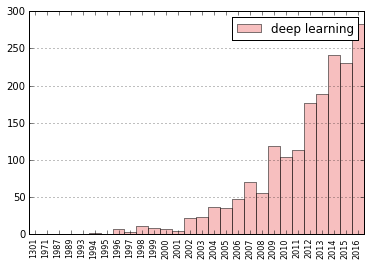

In [249]:
cnts = Counter(years_list)
labels, values = zip(*sorted(cnts.items(), key=lambda x: x[0]))
indices = np.arange(len(labels))
fix, ax = plt.subplots()
ax.bar(indices+1, values, 1, color='lightcoral', alpha=0.5, label='deep learning')
plt.xlim([0, indices.size])
plt.xticks(indices+0.5, labels, fontsize=8, rotation='vertical')
plt.legend()
ax.yaxis.grid(True)

## 5. What repositories host articles on this ? (API use)

In [4]:
'''
Collect repositories info
'''
repos_list = []
for hits in all_articles:
    for hit in hits['data']:
        print(hit)
        if 'repositories' in hit:
            for repo in hit['repositories']:
                if 'id' in repo:
                    repos_list.append(repo['id'])

NameError: name 'all_articles' is not defined

In [251]:
print(Counter(repos_list))

Counter({145: 495, 144: 380, 310: 62, 143: 56, 153: 41, 320: 35, 922: 30, 816: 29, 530: 24, 333: 23, 583: 23, 132: 20, 905: 20, 86: 19, 34: 18, 88: 15, 676: 15, 677: 13, 80: 12, 136: 11, 343: 11, 126: 10, 392: 10, 457: 10, 818: 9, 912: 9, 432: 9, 302: 8, 346: 8, 926: 8, 42: 7, 59: 7, 109: 7, 133: 7, 296: 7, 901: 7, 453: 7, 162: 7, 489: 7, 529: 6, 559: 6, 49: 6, 53: 6, 81: 6, 82: 6, 199: 6, 369: 6, 478: 6, 7: 5, 619: 5, 625: 5, 531: 5, 118: 5, 130: 5, 771: 5, 292: 5, 324: 5, 365: 5, 500: 5, 5: 4, 14: 4, 93: 4, 102: 4, 617: 4, 131: 4, 139: 4, 151: 4, 165: 4, 894: 4, 418: 4, 452: 4, 496: 4, 508: 4, 50: 3, 52: 3, 57: 3, 67: 3, 71: 3, 78: 3, 526: 3, 121: 3, 134: 3, 674: 3, 169: 3, 182: 3, 183: 3, 196: 3, 227: 3, 261: 3, 335: 3, 336: 3, 849: 3, 917: 3, 925: 3, 927: 3, 434: 3, 523: 2, 19: 2, 21: 2, 28: 2, 32: 2, 603: 2, 555: 2, 9: 2, 56: 2, 198: 2, 586: 2, 568: 2, 602: 2, 604: 2, 17: 2, 108: 2, 125: 2, 146: 2, 660: 2, 661: 2, 150: 2, 397: 2, 697: 2, 197: 2, 122: 2, 741: 2, 286: 2, 803: 2, 810

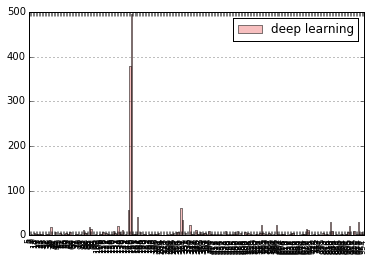

In [252]:
'''
Count and visualise in frequency histogram like before
'''
cnts = Counter(sorted(repos_list))
labels, values = zip(*sorted(cnts.items(), key=lambda x: x[0]))
indices = np.arange(len(labels))
fix, ax = plt.subplots()
ax.bar(indices+1, values, 1, color='lightcoral', alpha=0.5, label='deep learning')
plt.xlim([0, indices.size])
plt.xticks(indices+0.5, labels, fontsize=8, rotation='vertical')
plt.legend()
ax.yaxis.grid(True)
plt.show()

## 6. Fetch fulltext for further information extraction (API use)

done - stored as pickle in the current working directory

## 7. Where authors come from ?

Work on emails that appear on fulltext of the above articles


Load eu domains in a dictionary 

In [253]:
'''
Load eu domains in a dict
'''
import re,csv
email_pattern = re.compile('(@(\w[\w\-]+\.)+[\w\-]+)')

eu_domains = {}
with open('domains.txt') as f:
    reader = csv.reader(f, delimiter='\t')
    for line in reader:
        eu_domains[line[1][1:]] = line[0]
eu_domains

{'at': 'Austria',
 'be': 'Belgium',
 'bg': 'Bulgaria',
 'cy': 'Cyprus',
 'cz': 'Czech Republic',
 'de': 'Germany',
 'dk': 'Denmark',
 'ee': 'Estonia',
 'es': 'Spain',
 'eu': 'European Union',
 'fi': 'Finland',
 'fr': 'France',
 'gr': 'Greece',
 'hr': 'Croatia',
 'hu': 'Hungary',
 'ie': 'Ireland',
 'it': 'Italy',
 'lt': 'Lithuania',
 'lu': 'Luxembourg',
 'lv': 'Latvia',
 'mt': 'Malta',
 'nl': 'Netherlands',
 'pl': 'Poland',
 'pt': 'Portugal',
 'ro': 'Romania',
 'se': 'Sweden',
 'si': 'Slovenia',
 'sk': 'Slovakia',
 'uk': 'United Kingdom'}

In [254]:
'''
First fulltext of the first result of the resultset
i.e.
full_articles is a list of 20 resultsets (pages)
each page has its data under the 'data' field 
data is a result of 100 results 
each result has fields (title, description, ..), we are interested in the fullText one
'''
full_articles[0]['data'][0]['fullText']

'Learning Deep Structured Models\nLiang-Chieh Chen\nUCLA\nlcchen@cs.ucla.edu\nAlexander G. Schwing\nUniversity of Toronto\naschwing@cs.toronto.edu\nAlan L. Yuille\nUCLA\nyuille@stat.ucla.edu\nRaquel Urtasun\nUniversity of Toronto\nurtasun@cs.toronto.edu\nAbstract\nIn recent years the performance of deep learning algorithms has been demon-\nstrated in a variety of application domains. The goal of this paper is to enrich deep\nlearning to be able to predict a set of random variables while taking into account\ntheir dependencies. Towards this goal, we propose an efﬁcient algorithm that is\nable to learn structured models with non-linear functions. We demonstrate the\neffectiveness of our algorithm in the tasks of predicting words as well as codes\nfrom noisy images, and show that by jointly learning multilayer perceptrons and\npairwise features, signiﬁcant gains in performance can be obtained.\n1 Introduction\nDeep learning algorithms attempt to model high-level abstractions of the data u

In [255]:
'''
Count domains

Match email pattern, extract domain, check if EU domain 
'''

all_doms = []

doms = []
eu_papers = 0
non_eu_papers = 0
article_with_email_count = 0

for resultset in full_articles:
    for hit in resultset['data']:
        article_doms = []
        article_non_eu_doms = []
        if 'fullText' in hit:
            for match in email_pattern.findall(hit['fullText']): 
                pos = match[0].rfind('.')
                dom = match[0][pos+1:]
                if dom == 'com' or dom == 'org' or dom == 'net':
                    continue
                all_doms.append(dom)
                if dom in eu_domains:
                    article_doms.append(dom)
                else:
                    article_non_eu_doms.append(dom)
            if len(article_doms):
                eu_papers += 1
            if len(article_non_eu_doms):
                non_eu_papers += 1
            if len(article_doms) or len(article_non_eu_doms):
                article_with_email_count += 1
            doms.extend(set(article_doms))

In [256]:
'''
Quick look into results
'''
print('Country statistics', Counter(doms))
print('All countries', Counter(all_doms))
print('EU papers', eu_papers)
print('Non EU papers', non_eu_papers)

Country statistics Counter({'uk': 22, 'de': 4, 'es': 1, 'dk': 1, 'be': 1, 'nl': 1})
All countries Counter({'edu': 42, 'uk': 39, 'au': 20, 'hk': 10, 'de': 5, 'cn': 4, 'ca': 4, 'be': 4, 'ir': 3, 'EDU': 3, 'Learning': 1, 'dk': 1, 'mu': 1, 'ch': 1, 'edu20': 1, 'COM': 1, 'es': 1, 'mil': 1, 'my': 1, 'nl': 1})
EU papers 30
Non EU papers 46


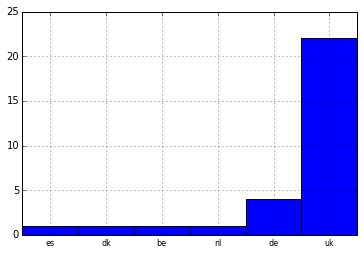

In [257]:
'''
Top EU countries into deep learning
'''
labels, values = zip(*sorted(Counter(doms).items(), key=lambda x: x[1]))
indexes = np.arange(len(labels))
width = 1
plt.grid()
plt.bar(indexes, values, width)
plt.xlim([0, indexes.size])
plt.xticks(indexes + width * 0.5, labels, fontsize=8)
plt.show()

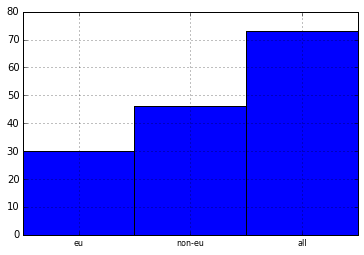

In [258]:
'''
Europe VS The World
'''
plt.bar(np.arange(3), [eu_papers, non_eu_papers, article_with_email_count], 1)
plt.grid()
plt.xticks(np.arange(3) + 0.5, ['eu', 'non-eu', 'all'], fontsize=8)
plt.show()